## CMPE 462 HOMEWORK 3

In [1]:
#@title Import libraries
# Allowed Libraries
import numpy as np
import matplotlib.pyplot as plt

tekdenahmet@gmail.com 
subject: [Cmpe462] Hw3-2015400123

# Multilayered Perceptron
**Target:** Implement multi-layer perceptron and analyze the results

**Data:**  The dataset (points2d.dat) is attached to the email. The sample includes 400 instances. Each instance is represented by a feature vector of 2 dimensions. The third column corresponds to the class (0/1/2) of the instance.

- Report how you split the sample for training and test. Report how you designed your neural network to solve this 3-class problem.(number of layers, error function etc.)
- Derive weight update equations using hyperbolic tangent activation function for hidden layers and sigmoid activation function for output layer . Submit a hard-copy of this derivation, drawing the the corresponding neural network with hidden units. All the formulas and the corresponding symbols should be clear. 
- Implement multi-layer perceptron with 5 hidden units. While training at each iteration, plot the error on training and test sets.
- After training converges: Plot the validation/test set and show true positives, true negatives,false positives, and false negatives (with different markers, colors, etc.)

## Cmpe462 Homework III   13.05.2019

#### Serkan Özel 2015400123


* In this project, I implemented a multilayer perceptron with 3 layers(1 hidden layer). The hidden layer has 5 units. The model can classify input into 3 classes with 2 features with above 70 percent accuracy. 400 data points are labeled and available. 

* I splitted the data set into 2 parts : Training set and test set. I used 80 20 ratio when dividing. I found this ratio from a question at stackoverflow: https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio

* I did not used validation set because data is very few and it is not mentioned in the project description.

* I used mean square error function. I used xavier weights initialization. I used gradient descent as optimizer.

* Hidden layer and input layer have extra 1 unit that is always one which is for bias.

In [2]:
#@title Raw data 
raw_data = """-1.767 0.38363 2
-6.726 -4.0492 2
-0.22038 -0.98075 1
-1.5749 2.6693 0
-2.633 -4.7374 2
-3.5992 1.2065 0
-2.5299 -3.3814 2
-4.4906 0.54938 1
-0.56843 -5.0566 0
3.443 -4.0595 2
-1.0986 -3.8255 2
2.2897 -3.4512 0
-1.6885 -5.1616 1
-6.2852 -0.45049 0
-1.4929 -1.9374 1
-4.0702 5.4884 0
-0.71574 -0.2868 0
3.74 -2.5012 0
-1.1954 -0.41306 1
-3.4265 -4.6438 1
-2.9935 0.73098 1
-0.58291 0.93284 1
-1.3917 3.0539 0
1.9196 0.40082 0
1.7001 -6.3202 2
-10.636 -7.027 2
-1.3934 -7.7066 2
-1.25 0.67522 0
-5.7079 1.5593 1
-3.133 -3.4085 1
-2.4125 -1.6444 2
-4.8166 -2.1013 2
-2.8143 -0.64221 2
-1.6382 3.005 1
-1.0483 4.6699 0
-2.2501 1.8789 0
-8.2792 -2.9443 2
-2.1648 -4.4213 1
-0.69198 -4.871 2
1.9003 -2.8093 1
-3.6309 -1.5255 2
-5.6541 0.88665 1
-0.34017 0.60786 2
0.85175 0.89943 0
-4.3166 -6.3278 2
-3.1529 0.73659 1
-2.2552 2.1643 0
-0.39738 4.0451 0
-1.1407 -5.8085 2
-7.4148 -7.3867 2
0.065343 1.7033 1
-3.5548 -6.3488 1
-4.475 1.621 1
-1.8731 -2.8926 1
-3.8381 -2.9576 2
-9.1427 -0.22347 1
3.285 -0.34522 0
-3.7591 3.8095 0
-6.0805 -2.2255 2
0.93453 4.6184 0
-5.8867 -7.6196 2
-2.17 -3.5102 2
-6.8086 -1.8216 2
-4.0298 -6.3618 2
-0.8166 -2.0103 1
-0.12908 -0.70043 2
-3.0918 -1.4671 1
-2.3061 -3.4637 2
-2.0829 -2.7403 2
-2.6463 2.7682 0
-2.2917 -2.405 1
-0.98073 -3.4802 0
2.209 3.0803 0
-4.329 -5.0984 2
0.054182 0.86466 1
-0.30221 -5.5289 1
4.0932 -1.3206 0
-2.2673 -2.6871 2
1.61 0.48651 0
-0.79242 5.3823 0
-6.3252 -5.0978 2
-1.5446 0.336 0
-0.002966 -3.5236 1
2.4317 -0.42651 0
-10.802 -1.6743 1
-0.69397 -4.7077 2
3.1326 1.0789 0
0.021415 3.6823 0
-4.0082 -1.9175 2
-2.0718 0.24549 1
-4.7544 1.8322 0
-1.6265 3.6434 1
-3.2156 -2.8578 2
-2.2426 -0.6841 2
0.28338 0.57295 0
-6.5974 -3.2102 2
-0.36781 -2.8348 1
-1.8222 0.31813 1
-0.98259 -1.4741 0
-2.3956 -3.8346 1
-0.55179 -0.7859 0
-0.18091 3.1991 0
-0.78098 4.5595 0
-0.91843 -3.578 2
-0.67136 -3.5335 2
-0.45331 -2.6163 0
-4.1307 1.6107 1
-5.6702 -0.98489 1
-4.5501 -0.52943 0
2.6756 0.097176 0
0.8005 -4.5296 2
-3.9424 5.6445 0
-0.35654 -1.6337 1
3.4071 5.3525 0
-2.6447 1.9685 0
-0.23259 -4.4525 1
-1.2386 5.8131 0
0.072072 -1.7075 1
-3.246 -0.30929 1
-4.2105 2.9841 0
-3.0503 1.505 1
-5.2639 -5.7231 2
2.7615 0.59818 0
0.50851 1.514 1
-0.98798 1.1692 1
-2.6016 1.2865 1
0.40485 2.3692 0
-2.4 -1.1673 1
-3.2565 -1.3909 1
-1.7801 2.3286 0
-3.3325 -5.1068 2
3.8447 3.7606 0
1.4779 7.4498 0
-0.28561 -1.3474 1
-0.78091 1.1745 0
1.5242 -1.9415 1
-1.8276 -0.12442 0
-1.0821 0.88844 0
-0.8686 3.7623 0
-4.0853 -2.276 2
-0.74172 -2.3912 2
2.2445 1.4689 0
-0.85853 0.41582 0
-4.2144 4.5985 0
-5.3184 -2.6437 2
-4.0458 -4.0793 2
-3.3872 -2.1029 2
3.6299 2.7453 0
-0.91351 1.5755 0
-5.283 -4.8342 2
-1.1428 -1.5409 1
-5.6098 -6.994 2
-0.48221 -1.0463 0
-4.0152 -7.9616 2
1.6396 6.1606 0
-2.3603 -4.5691 2
-5.0433 1.3866 1
-4.9847 -9.8059 2
-5.5438 0.09024 1
-1.1625 0.43295 0
-6.8814 -1.0605 2
-4.4788 2.3036 1
0.28321 -3.2861 0
2.2298 2.2154 0
-5.7256 -3.7086 2
-5.0611 2.0294 1
-7.0228 -2.1092 2
-3.799 -0.57539 0
-5.0039 1.8496 1
-3.8818 -6.7104 2
-0.12745 2.4244 0
-5.3858 -2.6771 2
-5.0352 -8.5962 2
-5.0135 1.5295 1
-5.0778 1.4826 2
3.376 0.36467 0
-7.0702 -4.4432 2
3.9919 3.4414 0
2.0765 -4.4119 2
-1.6049 -0.42583 2
-2.9793 -4.2238 2
-1.9093 -0.88568 1
-3.1469 -1.59 2
-2.4337 -1.1538 1
3.6288 3.765 0
-8.0187 -2.3675 2
2.9176 2.6436 0
0.48323 1.2693 0
-2.7409 0.88379 1
-2.1809 -6.1593 2
2.4033 0.58488 0
-0.72258 -1.3964 1
-6.3546 1.9013 1
-6.3106 1.7793 1
0.65649 2.872 0
-7.5787 -5.9847 2
-7.0855 0.94596 1
7.6281 0.93266 0
-4.5749 0.72823 2
0.7898 2.1878 0
-2.1549 -7.9912 2
0.46644 5.1081 0
-4.9926 5.6016 0
1.0659 5.0949 0
-1.3248 -0.9908 1
-0.90102 -2.0834 1
-1.5374 -2.653 1
-7.5081 5.1718 0
4.8846 7.8716 0
-4.0509 -1.1534 2
3.7871 2.2527 0
-3.7328 2.0556 1
-0.28919 -1.6488 1
-2.6517 -2.0751 1
-2.3222 -2.0949 2
-3.0243 -6.677 2
-0.31701 2.2806 0
-3.8996 -1.4129 2
-4.0774 4.6505 0
-5.5748 0.86664 1
-0.93673 -7.4118 2
-3.3492 0.11263 1
-0.96714 -1.0498 2
-6.2107 -7.6335 2
-8.2961 1.5885 1
-7.6671 -6.523 2
-3.0121 0.2169 2
0.024666 -1.1218 2
-2.1204 4.1943 0
-3.2981 1.1174 2
-0.31458 -3.5338 1
-3.3351 -3.4254 2
1.5267 -0.37374 0
-6.0606 -4.4521 2
-0.62843 1.5179 0
-1.1205 -2.7919 1
0.062929 -0.89216 0
-0.15408 -0.5726 1
-1.6943 3.1438 0
-3.5253 -0.43412 1
-3.8495 1.0096 1
-4.6141 0.68446 1
-1.137 -3.7151 2
-1.6333 0.49276 1
0.53317 -0.94746 0
-2.1655 -3.4748 2
5.4547 7.7128 0
0.94561 1.4062 0
-3.7593 0.93624 1
-0.25108 -0.94571 1
0.42045 -2.8076 1
-2.8725 1.3356 1
-10.079 -4.6758 2
-4.3105 -4.3638 2
-0.48666 -5.8428 2
-2.2774 -4.0088 2
-7.9127 1.4886 1
-1.4672 1.1757 0
-4.6405 -4.0262 2
-3.4965 -6.1015 2
-0.16156 -4.2051 2
-4.3324 2.0851 1
-4.5834 2.3967 1
0.21344 -0.82329 1
-0.23376 0.75519 1
-5.7374 -2.3269 2
-1.0123 1.206 1
-1.3475 -6.5036 2
-1.3709 3.3063 0
1.2622 -4.1595 2
-1.795 0.68091 1
3.2077 -0.14261 0
-7.1021 -5.7711 2
-2.738 -0.37368 1
2.5184 3.2669 0
-0.15361 -2.6246 2
2.8933 1.9606 0
1.018 -0.046308 0
-5.8842 -3.6631 2
-1.901 0.29838 0
-3.0622 0.035934 1
0.40152 -7.0633 2
-1.1547 -0.59382 1
-5.3108 -5.3287 2
0.93515 0.6091 0
-1.8936 -2.6959 2
1.6022 2.2627 0
-1.2888 2.1998 0
-1.3099 -2.4517 1
0.44283 -1.3007 1
-4.323 2.938 1
3.5984 -2.6779 0
-2.4553 -0.87746 1
-5.6545 0.35926 1
-8.0455 -1.6606 2
-2.1892 -7.952 2
-5.8482 -4.2447 2
-1.6512 5.1504 0
-1.32 -2.8917 1
-0.8223 -4.5052 1
-1.8969 -0.0046819 1
-1.6131 4.9385 0
-1.619 -2.4206 1
1.6705 -8.6795 2
7.8415 3.5739 0
1.8422 0.58145 0
-1.723 3.7099 0
-5.2107 4.5908 1
-3.7252 1.179 0
1.299 1.241 1
0.19532 0.073117 0
-2.931 -6.738 2
-7.2867 -4.6093 2
-0.67171 4.7157 0
-3.1927 -4.3466 2
-0.42604 -1.4665 1
-5.648 -3.2616 2
-1.453 -2.2036 1
-4.0571 -1.4139 2
-7.444 -4.5921 2
-2.8775 6.1634 0
-3.837 2.5357 1
2.0821 -2.8452 1
1.712 2.1488 0
-0.56083 -3.5306 0
1.716 -4.2087 2
-5.4886 2.5094 0
-5.0598 0.92668 1
-3.8042 -1.5914 2
-5.2107 -0.5349 1
-1.239 0.27126 1
-6.9573 -2.4493 2
-2.1817 -0.45058 1
-0.42833 -1.815 1
-5.1145 -4.4333 2
-3.4851 0.66339 0
3.0609 0.45202 0
-5.1553 -0.92585 2
-1.9548 0.14828 0
0.47504 1.9399 0
-0.96046 -5.3869 2
-0.83578 -5.297 2
-1.2966 1.1024 1
-9.206 -2.2908 2
-5.0092 -5.6964 2
-1.1748 -0.46186 1
-4.3077 -2.3256 2
0.088837 -1.6433 0
-2.1611 0.65521 2
-5.8755 -4.6678 2
1.1054 0.96831 0
-2.388 1.203 1
-5.7366 3.0167 1
-2.4352 -4.1524 2
4.3043 -0.1863 2
-3.518 -5.4008 2
0.37181 1.4335 1
-4.944 -1.6463 2
-6.6037 -2.1438 2
0.51841 -1.6757 1
-3.9587 1.2831 1
-4.0945 3.0818 1
1.1561 -0.59512 0
-1.1705 1.5696 1
-1.6155 5.6739 0
1.3141 0.89956 0
6.7687 0.59405 0
-3.9559 -0.69205 1
-2.4118 -4.2483 2
-2.3159 1.2988 1
2.7482 4.9216 0
-5.8731 -3.3839 2
0.05227 -2.9474 2
-3.96 -0.72334 1
-2.9151 -2.8496 1
-0.75484 -1.3363 1
-3.286 0.071889 2
-7.7584 0.7635 1
-0.9761 -0.62168 1
-4.1613 -4.8678 2
2.2014 3.0421 0
-0.13479 5.2812 0
0.25303 3.287 0
0.25425 1.2399 0
-2.1895 1.2185 1
-2.3688 -3.2766 1
2.0667 -2.5729 1
3.563 0.50137 0
-1.7623 -2.3224 1
2.3735 -0.29564 1
-0.77073 3.9141 0
-1.3482 -0.88039 0
-8.1045 -3.6264 2
-1.0538 -2.3281 1
-7.1055 -3.6192 2
-4.9757 3.4745 0
-0.21908 1.5263 1
-4.0886 -0.47492 1
-2.9044 1.7501 1
-7.1366 -4.4606 2"""

In [3]:
#@title Test and training data split
input_data = []

for line in raw_data.split("\n"):
  input_data.append(np.fromstring(line,sep=" "))

training_data = input_data[0:320][:]
test_data = input_data[320:][:]

training_input = []
training_label = []
test_input = []
test_label = []


for x in training_data:
  training_input.append([x[0],x[1]])
  training_label.append(int(x[2]))
for x in test_data:
  test_input.append([x[0],x[1]])
  test_label.append(int(x[2]))


Training set success rate:20.625
Test set success rate:25.0
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Training set success rate:74.375
Test set success rate:67.5


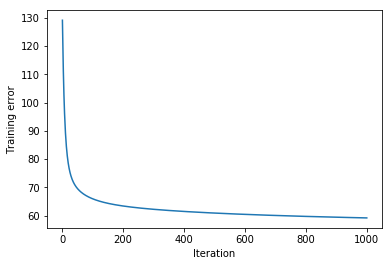

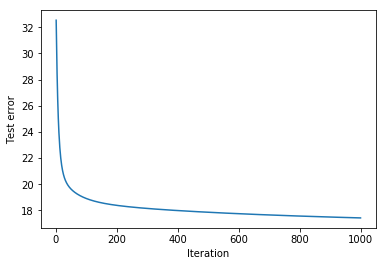

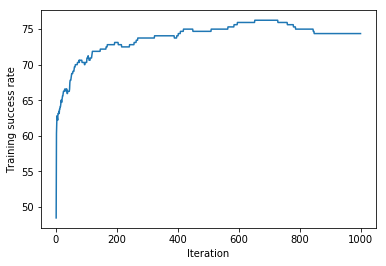

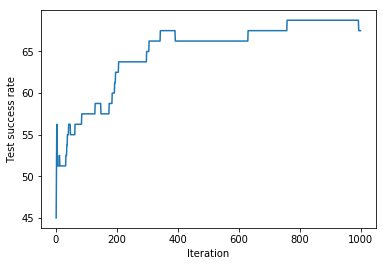

In [4]:
#@title The model
NUMBER_OF_ITERATIONS = 1000
LEARNING_RATE = 0.003
weights_input = [] # Weights closer to the input layer
weights_output = [] # Weights closer to the output layer

train_errors = []
test_errors = []
train_successes = []
test_successes = []

def initialize_weights(): # Uses xavier initialization https://hackernoon.com/how-to-initialize-weights-in-a-neural-net-so-it-performs-well-3e9302d4490f
  global weights_input,weights_output
  weights_input = np.random.rand(5,3)*np.sqrt(1/(2+5))
  weights_output = np.random.rand(3,6)*np.sqrt(1/(5+3))  
  
def train():
  iter_count = 0
  while iter_count < NUMBER_OF_ITERATIONS:
    update_weights()
    iter_count += 1
    if iter_count % 100 == 0:
      print("Iteration: " + str(iter_count))
    global train_error,test_error,train_successes,test_successes
    train_error,test_error = calculate_errors()
    train_success,test_success = calculate_percentage_successes()

    train_errors.append(train_error)
    test_errors.append(test_error)
    train_successes.append(train_success)
    test_successes.append(test_success) 
    
def calculate_errors():
  training_data_outputs,_ = forward_pass(training_input)
  expected_outputs = []
  for i in training_label:
    expected_output = [0,0,0]
    expected_output[i] = 1
    expected_outputs.append(expected_output)
    
  training_error = 1/2*np.sum(np.square(np.subtract(expected_outputs,training_data_outputs)))
  test_data_outputs,_ = forward_pass(test_input)
  expected_outputs = []
  for i in test_label:
    expected_output = [0,0,0]
    expected_output[i] = 1
    expected_outputs.append(expected_output)
    
  test_error = 1/2*np.sum(np.square(np.subtract(expected_outputs,test_data_outputs)))
  return training_error, test_error

def calculate_percentage_successes():
  training_predicts = predict(training_input)
  training_predicts = (training_predicts == training_label)
  training_success = 100.0*np.sum(training_predicts.astype(int))/training_predicts.size
  test_predicts = predict(test_input)
  test_predicts = (test_predicts == test_label)
  test_success = 100.0*np.sum(test_predicts.astype(int))/test_predicts.size
  return training_success,test_success

def update_weights():
  global LEARNING_RATE
  training_data_activations, hidden_unit_activations = forward_pass(training_input)
  for x in range(len(training_input)):
    for j in range(3):
      for i in range(6):
        expected_output = [0,0,0]
        expected_output[training_label[x]] = 1
        delta = (LEARNING_RATE * (expected_output[j] - training_data_activations[x][j]) 
        * training_data_activations[x][j] * (1 - training_data_activations[x][j]) 
        * hidden_unit_activations[x][i])
        weights_output[j][i] += delta

def predict(input_data):
  results = []
  for i in range(len(input_data)):
    net_i = np.matmul(weights_input,np.hstack((input_data[i],np.array(1))))
    o_i = np.tanh(net_i)
    net_j = np.matmul(weights_output,np.hstack((net_i,np.array(1))))
    o_j = sigmoid(net_j)
    results.append(np.argmax(o_j)) 
  return np.array(results)

def forward_pass(input_data):
  results = []
  hidden_results = []
  for i in range(len(input_data)):
    net_i = np.matmul(weights_input,np.hstack((input_data[i],np.array(1))))
    o_i = np.tanh(net_i)
    hidden_results.append(np.hstack((o_i,np.array(1))))
    net_j = np.matmul(weights_output,np.hstack((o_i,np.array(1))))
    o_j = sigmoid(net_j)
    results.append(o_j)
  return np.array(results),np.array(hidden_results) 
  
def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm
  
initialize_weights()
train_success,test_success = calculate_percentage_successes()
print("Training set success rate:" + str(train_success))
print("Test set success rate:" + str(test_success))
train()
train_success,test_success = calculate_percentage_successes()
print("Training set success rate:" + str(train_success))
print("Test set success rate:" + str(test_success))
plt.ylabel("Training error")
plt.xlabel("Iteration")
plt.plot(range(1,len(train_errors)+1),train_errors)
plt.figure()
plt.ylabel("Test error")
plt.xlabel("Iteration")
plt.plot(range(1,len(test_errors)+1),test_errors)

plt.figure()
plt.ylabel("Training success rate")
plt.xlabel("Iteration")
plt.plot(range(1,len(train_successes)+1),train_successes)
plt.figure()
plt.ylabel("Test success rate")
plt.xlabel("Iteration")
plt.plot(range(1,len(test_successes)+1),test_successes)




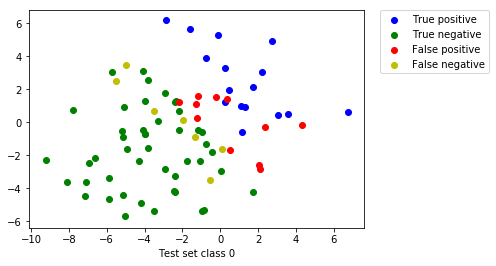

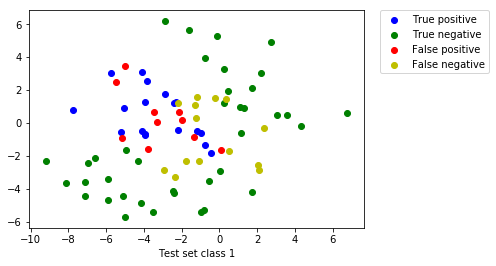

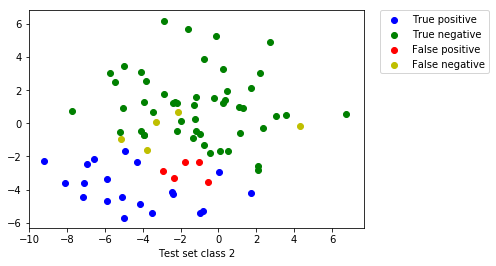

In [5]:
#@title  Plot test set
results = predict(test_input)
correct_wrong = np.array(test_label) == results

colors_00 = []
colors_01 = []
colors_02 = []  
colors_03 = []
colors_10 = []
colors_11 = [] 
colors_12 = [] 
colors_13 = [] 
colors_20 = []
colors_21 = []  
colors_22 = []  
colors_23 = [] 
# 0 true positive, 1 true negative, 2 false positive,3 false negative
for x in range(len(results)):
  if results[x] == 0 and test_label[x] == 0:  # true pos
    colors_00.append(test_input[x])
  elif results[x] != 0 and test_label[x] != 0: # true neg
    colors_01.append(test_input[x])
  elif results[x] == 0 and test_label[x] != 0: # false pos
    colors_02.append(test_input[x])
  elif results[x] != 0 and test_label[x] == 0: # false neg
    colors_03.append(test_input[x])
    
for x in range(len(results)):
  if results[x] == 1 and test_label[x] == 1: 
    colors_10.append(test_input[x])
  elif results[x] != 1 and test_label[x] != 1: 
    colors_11.append(test_input[x])
  elif results[x] == 1 and test_label[x] != 1: 
    colors_12.append(test_input[x])
  elif results[x] != 1 and test_label[x] == 1: 
    colors_13.append(test_input[x])
    
for x in range(len(results)):
  if results[x] == 2 and test_label[x] == 2: 
    colors_20.append(test_input[x])
  elif results[x] != 2 and test_label[x] != 2: 
    colors_21.append(test_input[x])
  elif results[x] == 2 and test_label[x] != 2: 
    colors_22.append(test_input[x])
  elif results[x] != 2 and test_label[x] == 2: 
    colors_23.append(test_input[x])
    

fig, ax = plt.subplots()
plt.xlabel("Test set class 0")
ax.scatter(np.array(colors_00)[:,0],np.array(colors_00)[:,1],c="b",label="True positive")
ax.scatter(np.array(colors_01)[:,0],np.array(colors_01)[:,1],c="g",label="True negative")
ax.scatter(np.array(colors_02)[:,0],np.array(colors_02)[:,1],c="r",label="False positive")
ax.scatter(np.array(colors_03)[:,0],np.array(colors_03)[:,1],c="y",label="False negative")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig, ax = plt.subplots()
plt.xlabel("Test set class 1")
ax.scatter(np.array(colors_10)[:,0],np.array(colors_10)[:,1],c="b",label="True positive")
ax.scatter(np.array(colors_11)[:,0],np.array(colors_11)[:,1],c="g",label="True negative")
ax.scatter(np.array(colors_12)[:,0],np.array(colors_12)[:,1],c="r",label="False positive")
ax.scatter(np.array(colors_13)[:,0],np.array(colors_13)[:,1],c="y",label="False negative")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig, ax = plt.subplots()
plt.xlabel("Test set class 2")
ax.scatter(np.array(colors_20)[:,0],np.array(colors_20)[:,1],c="b",label="True positive")
ax.scatter(np.array(colors_21)[:,0],np.array(colors_21)[:,1],c="g",label="True negative")
ax.scatter(np.array(colors_22)[:,0],np.array(colors_22)[:,1],c="r",label="False positive")
ax.scatter(np.array(colors_23)[:,0],np.array(colors_23)[:,1],c="y",label="False negative")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
